In [38]:
# Nonlinearity

<Axes: xlabel='palmer z-index', ylabel='precipitation'>

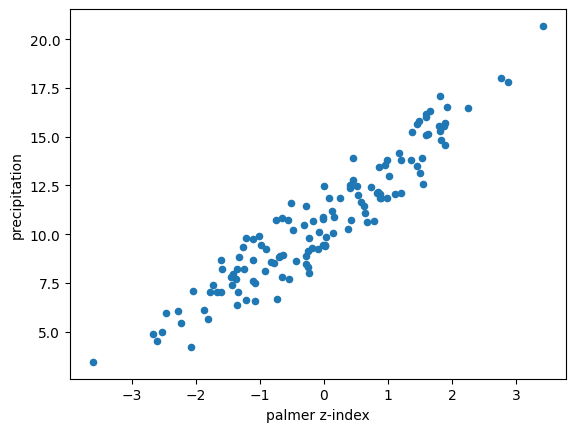

In [39]:
import pandas as pd

data = pd.read_csv("NJ_Precipitation.csv", index_col=0)
data.ffill()

data.plot.scatter("palmer z-index", "precipitation")

In [40]:
data.corr()

,precipitation,rank,anomaly,palmer z-index
precipitation,1.000000,-0.980744,1.000000,0.945916
rank,-0.980744,1.000000,-0.980744,-0.932261
anomaly,1.000000,-0.980744,1.000000,0.945916
palmer z-index,0.945916,-0.932261,0.945916,1.000000


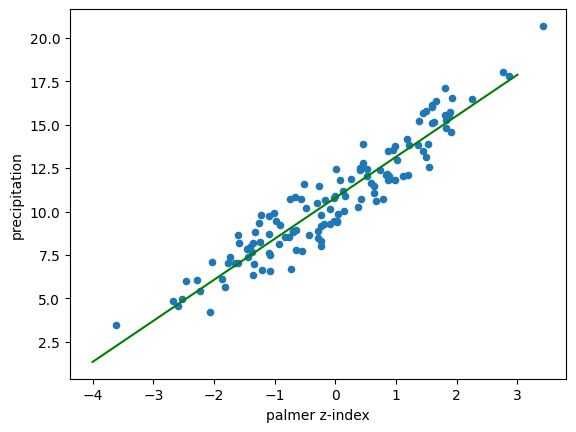

In [41]:
import matplotlib.pyplot as plt

data.plot.scatter("palmer z-index", "precipitation")

prediction = lambda x, w1=2.36, b=10.79: x * w1 + b

plt.plot([-4, 3], [prediction(-4),prediction(3)], 'green')

In [42]:
import numpy as np

def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

# Error with the weight of 2.36 and the bias of 10.79
print(mse(data["precipitation"], prediction(data["palmer z-index"])))

# Error with a small shift in our weight, to 2.4, and in our bias, to 10.8
print(mse(data["precipitation"], prediction(data["palmer z-index"], 2.4, 10.8)))

1.1492040861538464
1.1519995384615382


In [43]:
# Cut our Palmer z-index range into 25 bins
palm_bins = pd.cut(data["palmer z-index"], 15)

In [44]:
palm_bins

Date
September-November 1895    (-1.733, -1.263]
September-November 1896     (-0.325, 0.145]
September-November 1897     (-0.325, 0.145]
September-November 1898      (1.083, 1.553]
September-November 1899     (-0.325, 0.145]
                                 ...       
September-November 2020      (0.614, 1.083]
September-November 2021      (0.614, 1.083]
September-November 2022     (-0.325, 0.145]
September-November 2023      (0.145, 0.614]
September-November 2024    (-3.617, -3.141]
Name: palmer z-index, Length: 130, dtype: category
Categories (15, interval[float64, right]): [(-3.617, -3.141] < (-3.141, -2.671] < (-2.671, -2.202] < (-2.202, -1.733] ... (1.553, 2.022] < (2.022, 2.491] < (2.491, 2.961] < (2.961, 3.43]]

In [45]:
binned_palm = data["palmer z-index"].groupby(palm_bins).mean()

C:\Users\jonat\AppData\Local\Temp\ipykernel_10880\2158675799.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_palm = data["palmer z-index"].groupby(palm_bins).mean()


In [46]:
ratios = (data["precipitation"] - 10.79) / data ["palmer z-index"]

In [47]:
binned_ratio = ratios.groupby(palm_bins).mean()

C:\Users\jonat\AppData\Local\Temp\ipykernel_10880\4189157633.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_ratio = ratios.groupby(palm_bins).mean()


In [48]:
binned_ratio

palmer z-index
(-3.617, -3.141]    2.033241
(-3.141, -2.671]         NaN
(-2.671, -2.202]    2.225667
(-2.202, -1.733]    2.482585
(-1.733, -1.263]    2.126624
(-1.263, -0.794]    2.119285
(-0.794, -0.325]    2.453308
(-0.325, 0.145]     7.658427
(0.145, 0.614]      2.215911
(0.614, 1.083]      1.505948
(1.083, 1.553]      2.196457
(1.553, 2.022]      2.787391
(2.022, 2.491]      2.524444
(2.491, 2.961]      2.526246
(2.961, 3.43]       2.883382
dtype: float64

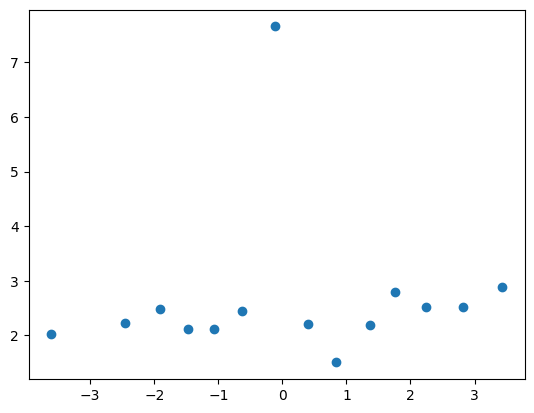

In [49]:
plt.scatter(binned_palm, binned_ratio)

In [50]:
# Neural Networks do 3 keys things: 

# 1. They add in a nonlinear transformation on top of a linear transformation
# 2. They have multiple layers, which can capture interactions between features
# 3. They have multiple hidden units, which each have slightly different linear and nonlinear transformations

In [51]:
                                    ###### Activation Functions ######

In [52]:
# $y = wx +b$

# $y = relu(wx + b)$

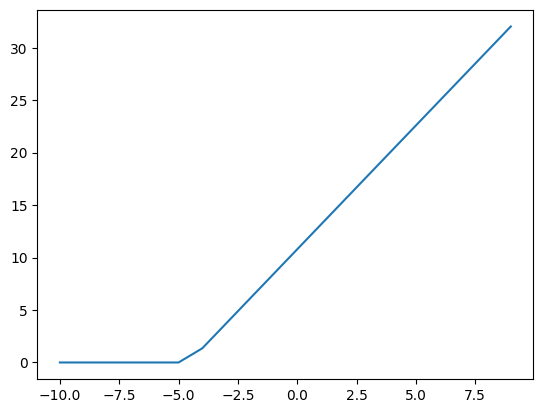

In [53]:
# 1.

precip = np.arange(-10,10)

plt.plot(precip, np.maximum(0, prediction(precip)))

In [54]:
                                ###### 2. Multiple Layers ######

In [55]:
"\hat{y} = w_{2} relu(w_{1}x + b_{1}) + b_{2}"

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\jonat\AppData\Local\Temp\ipykernel_10880\1580753619.py:1: SyntaxWarning: invalid escape sequence '\h'
  "\hat{y} = w_{2} relu(w_{1}x + b_{1}) + b_{2}"


'\\hat{y} = w_{2} relu(w_{1}x + b_{1}) + b_{2}'

(0.0, 20.0)

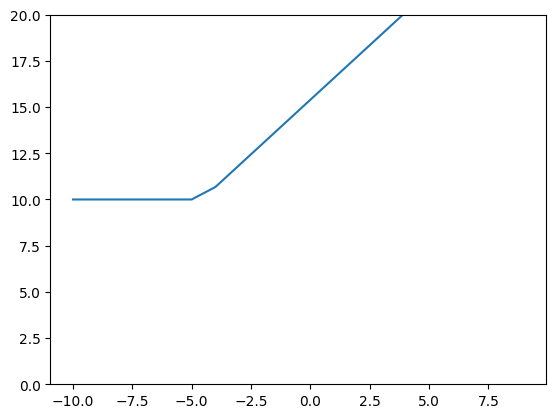

In [56]:
precip = np.arange(-10,10)

layer1 = np.maximum(0, prediction(precip))
layer2 = prediction(layer1, .5, 10)

plt.plot(precip, layer2)

plt.ylim((0,20))

In [57]:
                                ###### 3.Multiple Hidden Units ######

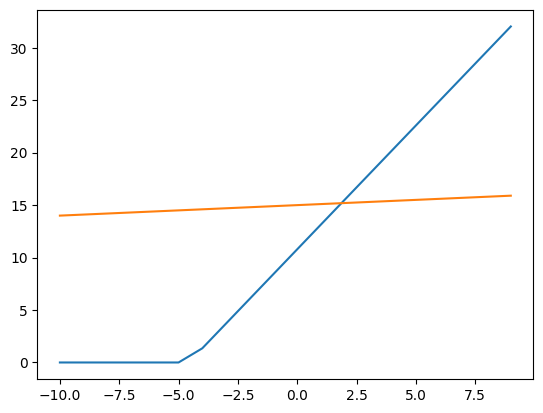

In [58]:
layer1_1 = np.maximum(0, prediction(precip))

layer1_2 = np.maximum(0, prediction(precip, .1, 15))

plt.plot(precip, layer1_1)
plt.plot(precip, layer1_2)

In [59]:
layer1_2

array([14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. ,
       15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9])

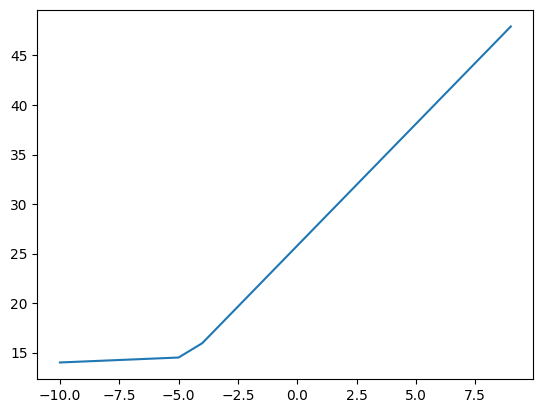

In [60]:
plt.plot(precip, layer1_1 + layer1_2)


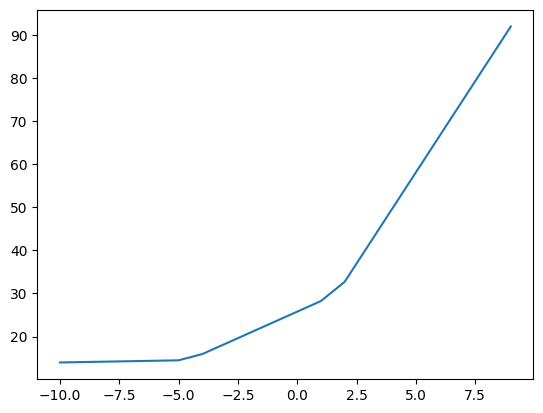

In [61]:
layer1_1 = np.maximum(0, prediction(precip))

layer1_2 = np.maximum(0, prediction(precip, .1, 15))

layer1_3 = np.maximum(0, prediction(precip, 6, -10) )


plt.plot(precip, layer1_1 + layer1_2 + layer1_3)

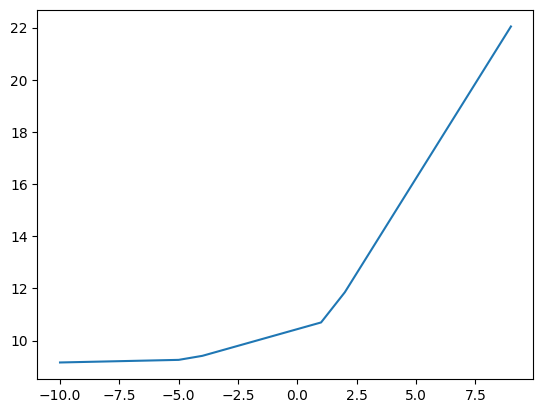

In [62]:
layer1_1 = np.maximum(0, prediction(precip))

layer1_2 = np.maximum(0, prediction(precip, .1, 15))

layer1_3 = np.maximum(0, prediction(precip, 4, -5) )

layer2 = layer1_1 * .1 + layer1_2 * .2 + layer1_3 * .3 + 6.36


plt.plot(precip, layer2)

In [63]:
                                        ###### The Forward Pass ######

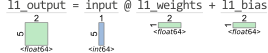

In [64]:
import tsensor

input = np.array([[15],[20], [25], [-4], [-2] ])

l1_weights = np.array([[.81, .1]])

l1_bias = np.array([[11.99, 10]])

with tsensor.explain():
    l1_output = input @ l1_weights + l1_bias

In [65]:
l1_output

array([[24.14, 11.5 ],
       [28.19, 12.  ],
       [32.24, 12.5 ],
       [ 8.75,  9.6 ],
       [10.37,  9.8 ]])

In [66]:
# Matrix Multiplication, i should be able to do the multiplication with the numbers above on paper and get the same output by hand,
# as it shows on screen. 

In [67]:
l1_activated = np.maximum(l1_output, 0)

In [68]:
l1_activated

array([[24.14, 11.5 ],
       [28.19, 12.  ],
       [32.24, 12.5 ],
       [ 8.75,  9.6 ],
       [10.37,  9.8 ]])

In [69]:
# $layer_{1}=relu(XW_{1} + B_{1})$

In [70]:
# $/hat{y}=W_{2}relu(XW_{1} + B_{1}) + B_{2}$  (This is the full equation for the Neural Network including Layer 2)

In [71]:
### Input to Layer 1 (Forward Pass):

#The inputs to Layer 1 are multiplied by the Layer 1 weights.
#The result is summed, and the Layer 1 biases are added to those sums.
#This output is passed through an activation function (e.g., ReLU, sigmoid, or softmax), which introduces non-linearity.

### Layer 1 to Layer 2:

#The outputs from Layer 1 (after applying the activation function) serve as the inputs to Layer 2.
#These inputs are multiplied by Layer 2 weights and summed.
#The Layer 2 biases are added, and the result is passed through another activation function.

### Process Repeats:

# This process continues for as many layers as the network has. The outputs of one layer become the inputs to the next.

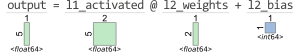

In [72]:
l2_weights = np.array([
    [.5],
    [.2]
    
])

l2_bias = np.array([[5]])

with tsensor.explain():
    output = l1_activated @ l2_weights + l2_bias

In [73]:
output

array([[19.37 ],
       [21.495],
       [23.62 ],
       [11.295],
       [12.145]])

In [74]:
# This is what we call the forward pass in neural networks, when we know our weights and biases and we pass our input through the
# forward pass to get out prediciton. and the output above is our prediction. 

#### Input Layer:

#This is the first layer of the network, often referred to as Layer 1.
#It directly receives the raw input data and passes it forward to the next layer.
#The input layer is not hidden because its role is to expose the data to the network.

#### Hidden Layers:

#These are the layers between the input layer and the output layer.
# Examples: Layer 2, Layer 3, etc.
# They are called "hidden" because they are not directly visible to the input or the final output of the model. 
# Their primary job is to extract and learn features from the data using weights, biases, and activation functions.

#### Output Layer:
# This is the final layer of the network, producing the predictions or outputs of the model.

In [78]:
palmer_z_index = np.array([[2], [3], [4], [-3], [-2]])

precipitation = np.array([[25], [20], [15], [-4], [-2]])

In [79]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

In [81]:
mse(precipitation, output) # This basically gives us our mean squared error for each of our input tempatures.

array([[ 31.6969  ],
       [  2.235025],
       [ 74.3044  ],
       [233.937025],
       [200.081025]])

In [83]:
 # With gradient descent we need to actually find the gradient of our  loss function right the rate of change so   
 #as I change the input to the loss function  how does the loss function actually change.
 # This basically tells us how much we need  to adjust our prediction to reduce our error:
 
def mse_grad(actual, predicted):
    return predicted - actual

mse_grad(precipitation, output)

array([[-5.63 ],
       [ 1.495],
       [ 8.62 ],
       [15.295],
       [14.145]])

In [ ]:
                                            #### The Backward Pass:

# So now we have the gradient of our loss with respect to the output of the network.
# Something next we need to do is something called back propogation, which will enable us to pull the gradients through the 
# network and use it to update the weights and biases in the network:

# Minute 33 in video 

In [ ]:
# The goal of the backward pass is to essentially calculate the partial  derivative of loss with respect to each parameter  

In [84]:
# The frist operation we will do is pulling the output to calculate the weight gradient for Layer 2: 
# (Refer to picture to see where that is)

output_gradient = mse_grad(precipitation, output)

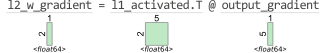

array([[464.65955],
       [346.398  ]])

In [85]:
from tsensor import explain as exp

with exp():
    l2_w_gradient = l1_activated.T @ output_gradient
    
l2_w_gradient

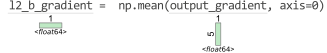

array([6.785])

In [87]:
with exp():
    l2_b_gradient =  np.mean(output_gradient, axis=0)

l2_b_gradient

In [88]:
# Display original layer 2 weights
l2_weights

array([[0.5],
       [0.2]])

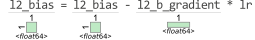

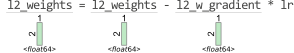

array([[0.49070681],
       [0.19307204]])

In [90]:
# Set a learning rate
lr = 1e-5

with exp():
    # Update the bias values
    l2_bias = l2_bias - l2_b_gradient * lr
    # Update the weight values
    l2_weights = l2_weights - l2_w_gradient * lr

l2_weights

In [ ]:
                                ###### Layer 1 Parameters ######

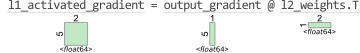

array([[-2.76267933, -1.08699559],
       [ 0.73360668,  0.2886427 ],
       [ 4.22989269,  1.66428098],
       [ 7.50536064,  2.95303685],
       [ 6.94104781,  2.73100401]])

In [96]:
with exp():
    l1_activated_gradient = output_gradient @ l2_weights.T
    
l1_activated_gradient

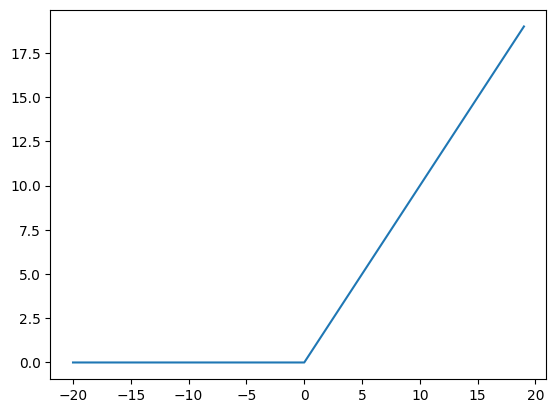

In [97]:
# Generate a range of predictions between -20 and -20.
precip = np.arange(-20,20)

# Predict precipitation given each of our input precip
plt.plot(precip, np.maximum(0, precip))

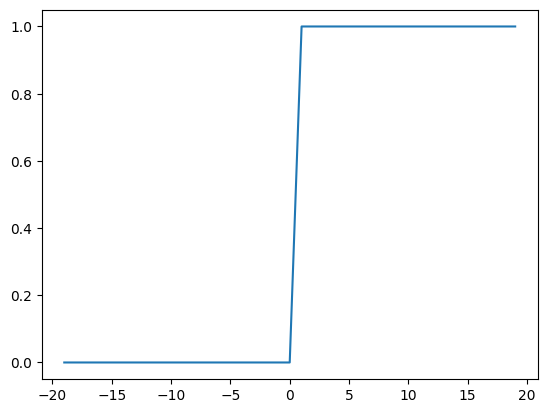

In [93]:
# Compute the relu function over the precipitation
activation = np.maximum(0, precip)

# Plot the input precipitation against the derivative of relu (the slope)
# np.roll will shift the values to the right one place, so we subtract the previous value
plt.plot(precip[1:], activation[1:] - np.roll(activation, 1)[1:])

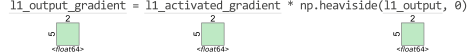

array([[-2.76267933, -1.08699559],
       [ 0.73360668,  0.2886427 ],
       [ 4.22989269,  1.66428098],
       [ 7.50536064,  2.95303685],
       [ 6.94104781,  2.73100401]])

In [98]:
with exp():
    l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)

l1_output_gradient

In [99]:
# Calculate gradients wrt weights and biases for layer 1
l1_w_gradient =  input.T @ l1_output_gradient # This line and the one line below, this part is where we calculate all the gradients, is called Back Propogation
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

l1_weights -= l1_w_gradient * lr # This line and the line below, when we update the weights is called gradient descent 
l1_bias -= l1_b_gradient * lr

In [100]:
l1_weights

array([[0.80964924, 0.09986199]])

In [101]:
l1_bias

array([[11.98996671,  9.9999869 ]])

In [ ]:
# At this point, we can end backpropagation, since we've computed the gradients at each of our layers.

In [ ]:
                                ###### Network Training Algorithm ######